In [8]:
import platform
import os
import matplotlib.font_manager as fm

# OS에 따른 기본 한글 폰트 자동 설정
def get_korean_font():
    system = platform.system()
    if system == "Windows":
        return fm.findfont("Malgun Gothic")
    elif system == "Darwin":  # macOS
        return fm.findfont("AppleGothic")
    else:  # Linux or 기타
        nanum_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
        if os.path.exists(nanum_path):
            return nanum_path
        return fm.findfont(fm.FontProperties(family="DejaVu Sans"))

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import os
import re
import matplotlib.font_manager as fm

# CSV 파일 불러오기
kyobo = pd.read_csv("../database/reviews_kyobo.csv")[["text", "date", "score"]].dropna()
yes24_raw = pd.read_csv("../database/reviews_yes24.csv")
aladin_raw = pd.read_csv("../database/reviews_aladin.csv")

# yes24 전처리: 컬럼명 통일 및 score 변환
yes24 = yes24_raw.rename(columns={"review": "text", "day": "date"})
yes24["score"] = yes24_raw["rate"].astype(str).str.extract(r"(\d+)").astype(float)
yes24 = yes24[["text", "date", "score"]].dropna()

# aladin 전처리: 컬럼명 통일
aladin = aladin_raw.rename(columns={"리뷰": "text", "날짜": "date", "별점": "score"})
aladin = aladin[["text", "date", "score"]].dropna()

# 사이트 정보 추가
kyobo["site"] = "kyobo"
yes24["site"] = "yes24"
aladin["site"] = "aladin"

# 데이터 통합
combined_df = pd.concat([kyobo, yes24, aladin], ignore_index=True)

# 한글 폰트 경로 (Nanum Gothic 사용 또는 맑은 고딕 등 직접 지정)
font_path = get_korean_font()
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# 바로 아래 추가!
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# 텍스트 전처리 함수 (한글만 추출 후 띄어쓰기 단위로 분리)
def tokenize(text):
    text = re.sub(r"[^가-힣\s]", "", str(text))
    return text.split()

# 저장 폴더 생성
os.makedirs("plots", exist_ok=True)

# 워드클라우드 생성
for site in combined_df["site"].unique():
    texts = combined_df[combined_df["site"] == site]["text"]
    
    words = []
    for line in texts:
        words.extend(tokenize(line))
    
    word_freq = Counter(words)
    
    wc = WordCloud(
        font_path=font_path,
        width=800,
        height=400,
        background_color="white"
    ).generate_from_frequencies(word_freq)
    
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{site.upper()} 워드클라우드")
    plt.savefig(f"plots/wordcloud_{site}.png", bbox_inches="tight")
    plt.close()

print("✅ 워드클라우드 이미지 생성 완료!")


✅ 워드클라우드 이미지 생성 완료!


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.feature_extraction.text import TfidfVectorizer

# 파일 경로
paths = {
    "kyobo": "../database/preprocessed_reviews_kyobo.csv",
    "yes24": "../database/preprocessed_reviews_yes24.csv",
    "aladin": "../database/preprocessed_reviews_aladin.csv"
}

# 저장 경로
save_dir = "plots"
os.makedirs(save_dir, exist_ok=True)

# 분석 실행
for site, path in paths.items():
    df = pd.read_csv(path)

    # cleaned_text가 없거나 결측치 있으면 제거
    if "cleaned_text" not in df.columns:
        print(f"⚠️ {site} 파일에 'cleaned_text' 컬럼 없음")
        continue
    df = df.dropna(subset=["cleaned_text"])

    # TF-IDF 벡터화 (상위 100개 단어)
    vectorizer = TfidfVectorizer(max_features=100)
    tfidf_matrix = vectorizer.fit_transform(df["cleaned_text"])
    feature_names = vectorizer.get_feature_names_out()

    # 평균 TF-IDF 계산
    avg_tfidf = tfidf_matrix.mean(axis=0).A1
    tfidf_scores = pd.Series(avg_tfidf, index=feature_names).sort_values(ascending=False)


    # 폰트 경로 설정
    font_path = fm.findfont("Malgun Gothic")  # Windows
    # font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # Linux/Colab
    
    # 한글 폰트 설정
    plt.rcParams["font.family"] = fm.FontProperties(fname=font_path).get_name()

    # 시각화 (Top 10 단어)
    plt.figure(figsize=(10, 5))
    tfidf_scores.head(10).plot(kind="bar", color="skyblue")
    plt.title(f"{site.upper()} 사이트 - 상위 TF-IDF 단어 TOP 10")
    plt.ylabel("평균 TF-IDF 점수")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/tfidf_top_words_{site}.png")
    plt.close()

print("✅ TF-IDF 분석 및 시각화 완료")


✅ TF-IDF 분석 및 시각화 완료


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# 폰트 경로 지정: OS에 따라 다름
# Windows: Malgun Gothic / Linux: NanumGothic
font_path = fm.findfont("Malgun Gothic")  # 윈도우면 이거
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 리눅스/Colab용

# matplotlib 한글 설정
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()

# WordCloud 한글 설정 예시
wc = WordCloud(font_path=font_path, width=800, height=400, background_color="white")


✅ Saved figure to analysis_plots/daily_review_trends.png


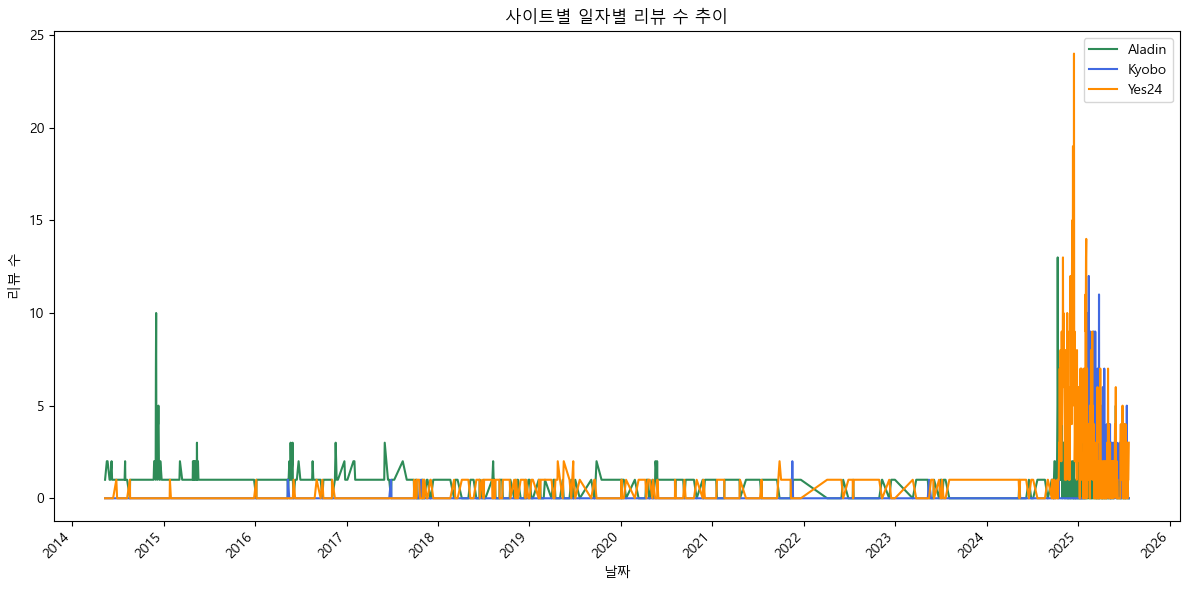

In [ ]:
# Cell 1: 라이브러리 불러오기 및 한글 폰트 설정
import os
import pandas as pd
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

# Jupyter 노트북에서 인라인 플롯 사용
%matplotlib inline

def get_korean_font():
    """운영체제에 맞는 한국어 폰트 경로를 반환합니다."""
    system = platform.system()
    if system == "Windows":
        return fm.findfont("Malgun Gothic")
    elif system == "Darwin":  # macOS
        return fm.findfont("AppleGothic")
    else:
        nanum = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
        if os.path.exists(nanum):
            return nanum
        return fm.findfont(fm.FontProperties(family="DejaVu Sans"))

font_path = get_korean_font()
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()


# Cell 2: 데이터 로드 및 전처리, 시각화 함수 정의

def load_reviews(path, site, rename_cols=None, score_col=None, date_format=None):
    """리뷰 CSV를 로드하고 통합된 컬럼으로 반환합니다."""
    df = pd.read_csv(path)
    if rename_cols:
        df = df.rename(columns=rename_cols)
    if score_col:
        df['score'] = df[score_col].astype(str).str.extract(r"(\d+)")[0].astype(float)
    elif 'score' in df.columns:
        df['score'] = df['score'].astype(float)
    df = df[['text','date','score']].dropna()
    df['site'] = site
    if date_format:
        df['date'] = pd.to_datetime(df['date'].astype(str).str.strip(), format=date_format, errors='coerce')
    else:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
    return df.dropna(subset=['date'])


def plot_review_trends(dfs, save_path=None):
    """일자별 리뷰 수 트렌드 시각화 및 저장(optional)."""
    df = pd.concat(dfs, ignore_index=True)
    df['date_only'] = df['date'].dt.date
    daily = df.groupby(['date_only','site']).size().reset_index(name='count')
    pivot = daily.pivot(index='date_only', columns='site', values='count').fillna(0)

    plt.figure(figsize=(12, 6))
    colors = {'kyobo':'royalblue','yes24':'darkorange','aladin':'seagreen'}
    for site in pivot.columns:
        plt.plot(pivot.index, pivot[site], label=site.capitalize(), color=colors.get(site))

    # x축: 연도 단위 1년 간격, 연도 라벨
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45, ha='right')

    plt.title('사이트별 일자별 리뷰 수 추이')
    plt.xlabel('날짜')
    plt.ylabel('리뷰 수')
    plt.legend()
    plt.tight_layout()

    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved figure to {save_path}")

    plt.show()


# Cell 3: 데이터 로드 및 시각화 실행
base = os.path.join('..', 'database')

kyobo = load_reviews(
    os.path.join(base, 'reviews_kyobo.csv'),
    site='kyobo'
)

yes24 = load_reviews(
    os.path.join(base, 'reviews_yes24.csv'),
    site='yes24',
    rename_cols={'review':'text', 'day':'date'},
    score_col='rate',
    date_format='%Y-%m-%d'
)

aladin = load_reviews(
    os.path.join(base, 'reviews_aladin.csv'),
    site='aladin',
    rename_cols={'리뷰':'text', '날짜':'date'},
    score_col='별점',
    date_format='%Y-%m-%d'
)

# 그래프를 그리고 PNG로 저장
plot_review_trends(
    [kyobo, yes24, aladin],
    save_path='plots/daily_review_trends.png'
)

# 필요시 인터랙티브 HTML 저장 코드 추가 예시
#
# import plotly.express as px
# df_all = pd.concat([kyobo, yes24, aladin], ignore_index=True).dropna(subset=['date'])
# df_all['date_only'] = df_all['date'].dt.date
# daily2 = df_all.groupby(['date_only','site']).size().reset_index(name='count')
# fig = px.line(daily2, x='date_only', y='count', color='site', title='Interactive Trend')
# fig.update_layout(legend_itemclick='toggleothers')

# fig.write_html('plots/daily_review_trends_interactive.html', include_plotlyjs='cdn')


In [ ]:
# Cell 4: 인터랙티브 Plotly 차트 (범례 클릭으로 단일 표시, 연도별 연속 틱)

import pandas as pd
import plotly.express as px
import os

# Cell 3에서 정의된 kyobo, yes24, aladin DataFrame 재사용
df_all = pd.concat([kyobo, yes24, aladin], ignore_index=True).dropna(subset=['date'])
df_all['date_only'] = df_all['date'].dt.date

daily = df_all.groupby(['date_only', 'site']).size().reset_index(name='count')

fig = px.line(
    daily,
    x='date_only',
    y='count',
    color='site',
    labels={'date_only': '날짜', 'count': '리뷰 수', 'site': '사이트'},
    title='사이트별 일자별 리뷰 수 추이 (범례 클릭으로 단일 표시, 연도별 연속 틱)'
)

# 범례 클릭 시 해당 시리즈만 표시
fig.update_layout(legend_itemclick='toggleothers')

# 연도별 연속 틱
years = pd.date_range(
    start=daily['date_only'].min(), 
    end=daily['date_only'].max(), 
    freq='YS'
)
fig.update_xaxes(tickvals=years, tickformat='%Y')

# ─── 저장 경로 지정 ───
out_dir = 'plots'
os.makedirs(out_dir, exist_ok=True)
out_fn = os.path.join(out_dir, 'daily_review_trends_interactive.html')

# HTML로 저장
fig.write_html(out_fn, include_plotlyjs='cdn')
print(f"✅ Interactive chart saved to: {os.path.abspath(out_fn)}")

# 차트 표시
fig.show()


✅ Interactive chart saved to: c:\YBIGTA_newbie_team_project\review_analysis\analysis_plots\daily_review_trends_interactive.html
